Лабораторна робота №4(Рівень 2) Шкуропінського Максима студента групи ФБ-33

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder

# ---------- Завантаження даних ----------
FILENAME = "auto-mpg.data"
# Pandas
columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
               'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(FILENAME, delim_whitespace=True,  header=None, names=columns, na_values='?')
# Numpy
dtype = [('mpg', 'f8'), ('cylinders', 'f8'), ('displacement', 'f8'),
             ('horsepower', 'f8'), ('weight', 'f8'), ('acceleration', 'f8'),
             ('model_year', 'f8'), ('origin', 'f8'), ("car_name", "U50")]

np_data = np.array([tuple(row) for row in df.to_numpy()], dtype=dtype)

C:\Users\maxym\AppData\Local\Temp\ipykernel_13388\1006439463.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(FILENAME, delim_whitespace=True,  header=None, names=columns, na_values='?')


In [41]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

1)Поборотися із зниклими даними.

In [42]:
def fill_missing_with_neighbors(df):
    """
    Заповнює пропущені значення у DataFrame значеннями з сусідніх клітин.
    Використовує методи 'ffill' (forward fill) та 'bfill' (backward fill).
    """
    df.ffill(inplace=True)  # Заповнює пропуски значеннями з попередніх рядків
    df.bfill(inplace=True)  # Заповнює пропуски значеннями з наступних рядків
    return df
cl_df = fill_missing_with_neighbors(df)

In [39]:
cl_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [107]:
df.dropna(inplace=True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [108]:
np_data = np_data[~np.isnan(np_data['horsepower'])]

In [46]:
def fill_missing_with_neighbors_np(np_data):
    for name in np_data.dtype.names:
        if np.issubdtype(np_data[name].dtype, np.number):
            col = np_data[name]
            # Forward fill
            for i in range(1, len(col)):
                if np.isnan(col[i]) and not np.isnan(col[i - 1]):
                    col[i] = col[i - 1]
            # Backward fill
            for i in range(len(col) - 2, -1, -1):
                if np.isnan(col[i]) and not np.isnan(col[i + 1]):
                    col[i] = col[i + 1]
    return np_data
np_data = fill_missing_with_neighbors_np(np_data)

2)Пронормувати вибраний датасет або стандартизувати його

In [109]:
# Numpy
def standardize_all_np(data):
    data = data.copy()
    for name in data.dtype.names:
        if np.issubdtype(data[name].dtype, np.number):
            col = data[name]
            standardized = (col - np.mean(col)) / np.std(col)
            data[name] = standardized
            print(f"NumPy | Standardized '{name}': {standardized[:5]}")
    return data

s_np_data = standardize_all_np(np_data)

# Pandas
def standardize_all_df(data):
    data = data.copy()
    for col in data.select_dtypes(include='number').columns:
        standardized = (data[col] - data[col].mean()) / data[col].std()
        data[col] = standardized
        print(f"Pandas | Standardized '{col}': {data[col].head().to_list()}")
    return data

s_df = standardize_all_df(df)

NumPy | Standardized 'mpg': [-0.69863841 -1.08349824 -0.69863841 -0.95521163 -0.82692502]
NumPy | Standardized 'cylinders': [1.48394702 1.48394702 1.48394702 1.48394702 1.48394702]
NumPy | Standardized 'displacement': [1.07728956 1.48873169 1.1825422  1.04858429 1.02944745]
NumPy | Standardized 'horsepower': [0.66413273 1.57459447 1.18439658 1.18439658 0.92426466]
NumPy | Standardized 'weight': [0.62054034 0.84333403 0.54038176 0.53684535 0.5557062 ]
NumPy | Standardized 'acceleration': [-1.285258   -1.46672362 -1.64818924 -1.285258   -1.82965485]
NumPy | Standardized 'model_year': [-1.62531533 -1.62531533 -1.62531533 -1.62531533 -1.62531533]
NumPy | Standardized 'origin': [-0.71664105 -0.71664105 -0.71664105 -0.71664105 -0.71664105]
Pandas | Standardized 'mpg': [-0.6977467192333153, -1.0821153447806167, -0.6977467192333153, -0.953992469598183, -0.8258695944157491]
Pandas | Standardized 'cylinders': [1.482053026528959, 1.482053026528959, 1.482053026528959, 1.482053026528959, 1.48205302

3)Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

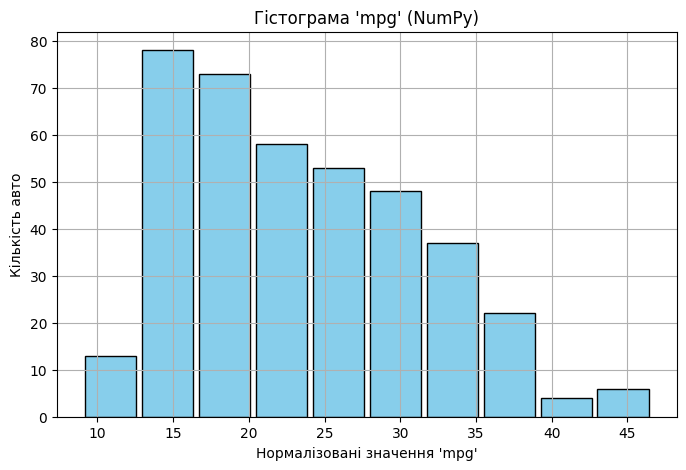

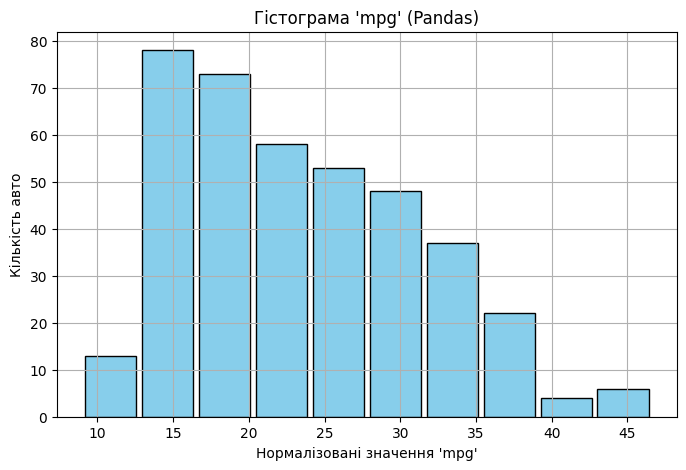

In [110]:
plt.figure(figsize=(8, 5))
plt.hist(np_data["mpg"], bins=10, edgecolor="black", color="skyblue", rwidth=0.9)
plt.title("Гістограма 'mpg' (NumPy)")
plt.xlabel("Нормалізовані значення 'mpg'")
plt.ylabel("Кількість авто")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(df["mpg"], bins=10, edgecolor="black", color="skyblue", rwidth=0.9)
plt.title("Гістограма 'mpg' (Pandas)")
plt.xlabel("Нормалізовані значення 'mpg'")
plt.ylabel("Кількість авто")
plt.grid(True)
plt.show()

4)Збудувати графік залежності одного integer/real атрибута від іншого.

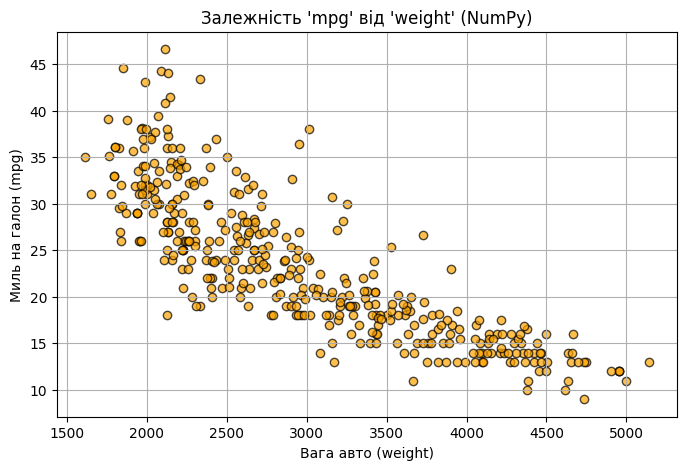

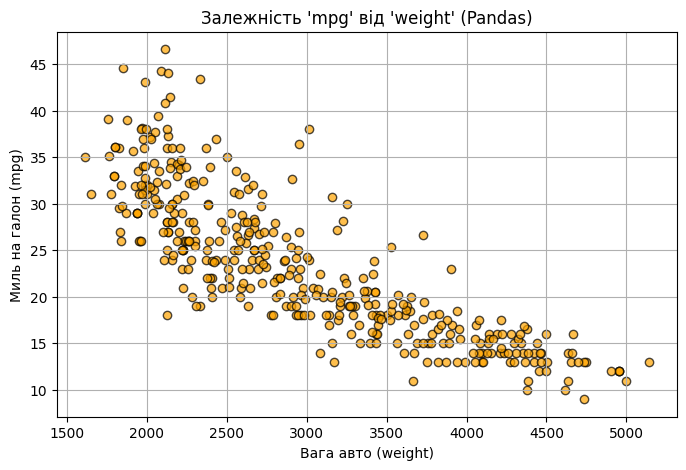

In [111]:
plt.figure(figsize=(8, 5))
plt.scatter(np_data["weight"], np_data["mpg"], color="orange", edgecolor='k', alpha=0.7)
plt.title("Залежність 'mpg' від 'weight' (NumPy)")
plt.xlabel("Вага авто (weight)")
plt.ylabel("Миль на галон (mpg)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(df["weight"], df["mpg"], color="orange", edgecolor='k', alpha=0.7)
plt.title("Залежність 'mpg' від 'weight' (Pandas)")
plt.xlabel("Вага авто (weight)")
plt.ylabel("Миль на галон (mpg)")
plt.grid(True)
plt.show()

5)Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [112]:
pearson_corr, _ = pearsonr(df["mpg"], df["weight"])
spearman_corr, _ = spearmanr(df["mpg"], df["weight"])

print(f"[Pandas] Коефіцієнт Пірсона: {pearson_corr:.4f}")
print(f"[Pandas] Коефіцієнт Спірмена: {spearman_corr:.4f}")


mpg_np = np_data["mpg"]
weight_np = np_data["weight"]
pearson_corr, _ = pearsonr(mpg_np, weight_np)
spearman_corr, _ = spearmanr(mpg_np, weight_np)

print(f"[NumPy] Коефіцієнт Пірсона: {pearson_corr:.4f}")
print(f"[NumPy] Коефіцієнт Спірмена: {spearman_corr:.4f}")

[Pandas] Коефіцієнт Пірсона: -0.8322
[Pandas] Коефіцієнт Спірмена: -0.8756
[NumPy] Коефіцієнт Пірсона: -0.8322
[NumPy] Коефіцієнт Спірмена: -0.8756


6)Провести One Hot Encoding категоріального string атрибуту.

In [113]:
car_names_pd = df[["car_name"]]

# Ініціалізуємо та застосовуємо
encoder = OneHotEncoder(sparse_output=False)
car_names_encoded_pd = encoder.fit_transform(car_names_pd)

print(f"[Pandas] One Hot закодовано. Форма: {car_names_encoded_pd.shape}")

[Pandas] One Hot закодовано. Форма: (392, 301)


In [48]:
encoded_df = pd.DataFrame(car_names_encoded_pd, columns=encoder.get_feature_names_out(["car_name"]))
print(encoded_df.head())

   car_name_amc ambassador brougham  car_name_amc ambassador dpl  \
0                               0.0                          0.0   
1                               0.0                          0.0   
2                               0.0                          0.0   
3                               0.0                          0.0   
4                               0.0                          0.0   

   car_name_amc ambassador sst  car_name_amc concord  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   

   car_name_amc concord d/l  car_name_amc concord dl 6  car_name_amc gremlin  \
0                       0.0                        0.0                   0.0   
1                       0.0                        0.0                   0.0   
2             

7)Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі.

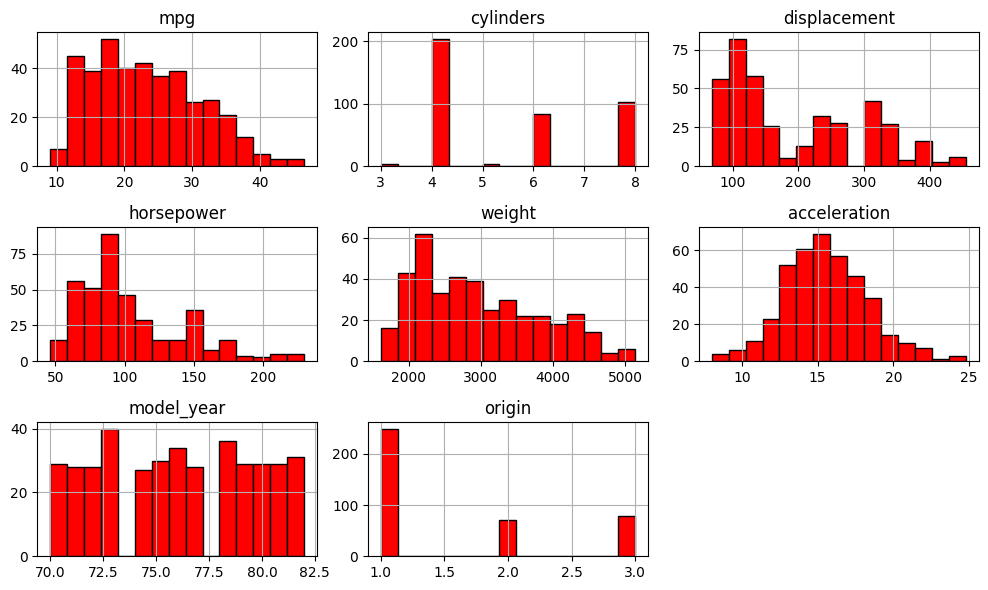

In [127]:
df.hist(bins=15, color='red', edgecolor='black', figsize=(10, 6))
plt.tight_layout()
plt.show()

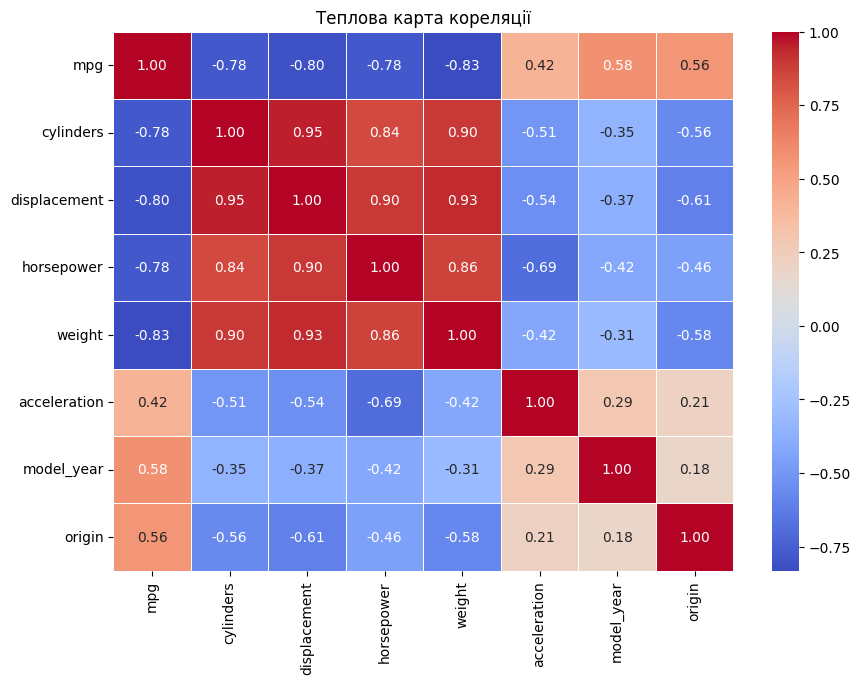

In [124]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Теплова карта кореляції")
plt.show()

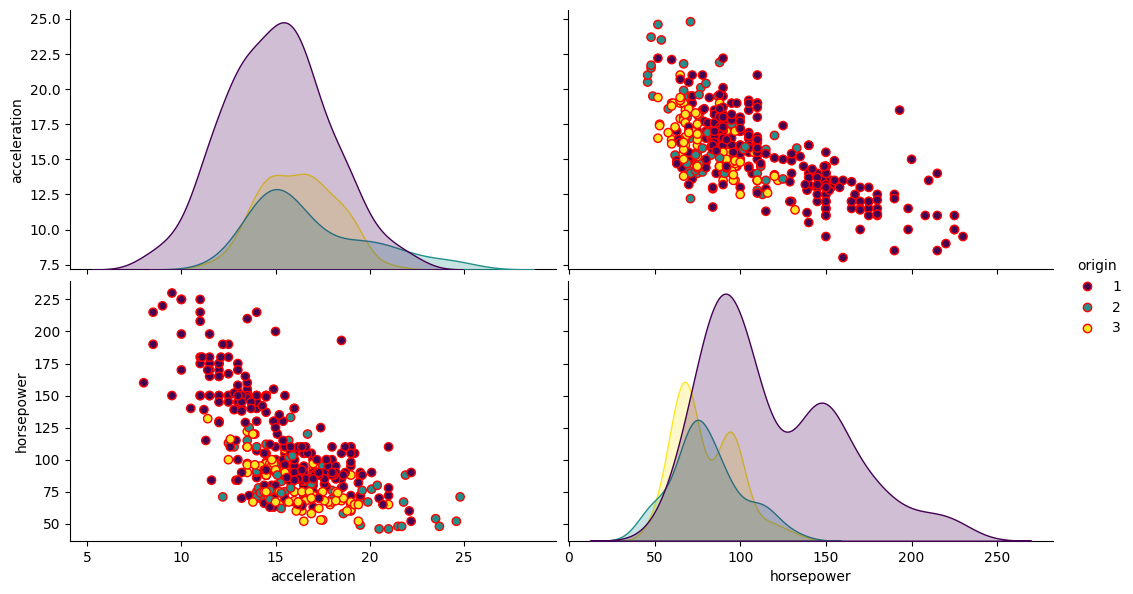

In [130]:
cols = ['acceleration', 'origin', 'horsepower']

sns.pairplot(df[cols], hue='origin', height=3, aspect=1.8, 
                palette="viridis", plot_kws=dict(edgecolor="red", linewidth=1.0))

plt.show()